In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import warnings



np.random.seed(42)
warnings.filterwarnings('ignore')

#### Importera delar från del1:

In [84]:
def visa_statistik(df):
    kolumner = ["age", "systolic_bp", "cholesterol", "weight" ]
    for kol in kolumner:
        print(f"{kol}: medel={df[kol].mean():.1f}, median={df[kol].median():.1f}")

kolumner = ["age", "weight", "height", "systolic_bp", "cholesterol"]
stats_df = pd.DataFrame(columns=["mean", "median", "min", "max"], index=kolumner)

for col in kolumner:
    col_vals = df[col].dropna()
    stats_df.loc[col] = [np.mean(col_vals), np.median(col_vals), np.min(col_vals), np.max(col_vals)]

def skapa_grafer(df):
    fig, axs = plt.Subplots(2, 2, figsize=(12, 8))

    num_kol = ["age", "weight", "systolic_bp", "cholesterol" ]
    sns.heatmap(df[num_kol].corr(),annot=True, ax=axs[0,0])

    axs[0,1].scatter(df["age"], df["systolic_bp"], alpha=0.5)
    axs[0,1].set_title("Ålder vs Blodtryck")
    axs[0,1].boxplot([df[df["sex"]=="M"]["systolick_bp"],
                    df[df["sex"]=="F"]["systolic_bp"]],
                    labels=["Män", "Kvinnor"])
    
    sjukdom_per_kön = df.groupby("sex")["disease"].mean() * 100
    axs[1,1].bar("sjuk_per_kön.index, sjuk_per_kön.values")
    
    plt.tight_layout()
    plt.show()
    
df = pd.read_csv("health_study_dataset.csv")
print(df.head())
df.info()

   id  age sex  height  weight  systolic_bp  cholesterol smoker  disease
0   1   57   F   168.9    65.8        141.8         4.58     No        0
1   2   47   M   180.4    95.9        144.8         5.18    Yes        0
2   3   59   F   169.9    82.2        151.7         6.16     No        0
3   4   72   M   157.7    93.1        151.0         6.63     No        0
4   5   46   M   192.6   104.1        144.1         5.21     No        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int6

#### Andel personer med sjukdom

In [85]:
sjuckdom_grupp = df["disease"].mean()
print(f"Andel med sjukdom:{sjuckdom_grupp:3f}")

np .random.seed(42)
simulerad = np.random.binomial(n=1, p=sjuckdom_grupp, size=1000)
andel_simulerad =np.mean(simulerad)
print(f"andel med sjukdom i simulerad data: {andel_simulerad:3f}")

differens = sjuckdom_grupp - andel_simulerad
print(f"Skillnaden i andel med sjukdom mellan verklig och simulerad data: {differens:3f}")

Andel med sjukdom:0.058750
andel med sjukdom i simulerad data: 0.056000
Skillnaden i andel med sjukdom mellan verklig och simulerad data: 0.002750


#### Klasser:

In [86]:
class HealsAnalyz:

    def __init__(self, data):
        self.data = data

    def sammanfattning(self):
        return{
            "antal": len(self.data),
            "antal_sjuk": self.data["disease"].mean() * 100,
            "medelålder": self.data["age"].mean()
        }
    
    def regression(self, x_kol, y_kol):
        x = self.data[[x_kol]] if isinstance(x_kol, str) else self.data[x_kol]
        y =self.data[y_kol]

        
        model = LinearRegression()
        model.fit(x, y)

        return {
            "r2": model.score(x, y),
            "koeff": model.coef_,
            "intercept": model.intercept_
        }
   
analysator = HealsAnalyz(df)
print("sammanfattning:")
for nyckel, värde in analysator.sammanfattning().items():
        print(f"{nyckel}: {värde}")

sammanfattning:
antal: 800
antal_sjuk: 5.875
medelålder: 49.42625


#### Linjer algebra - Regression:

In [87]:
print("\nREGRESSION ANALYS:")

reg1 = analysator.regression('age', 'systolic_bp')
print(f"Ålder -> Blodtryck: R² = {reg1['r2']:.3f}")

reg2 = analysator.regression(['age', 'weight'], 'systolic_bp')
print(f"Ålder + Vikt -> Blodtryck: R² = {reg2['r2']:.3f}")


REGRESSION ANALYS:
Ålder -> Blodtryck: R² = 0.369
Ålder + Vikt -> Blodtryck: R² = 0.405


#### Linjer Algebra - PCA:


PCA ANALYS:
PC1 förlkarar 54% av varjansen
PC2 förlkarar 33.9% av varjansen


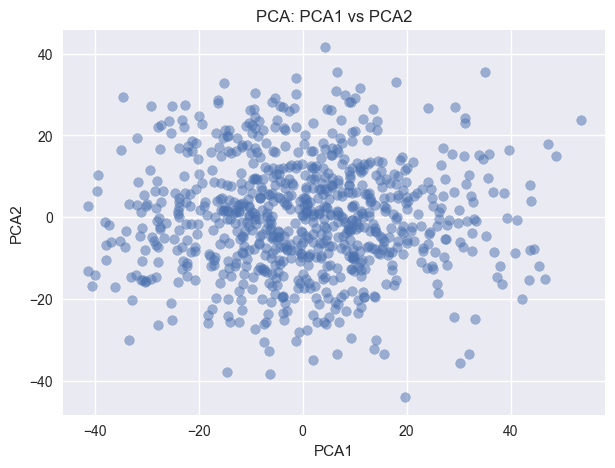

In [88]:
print("\nPCA ANALYS:")
from sklearn.decomposition import PCA

num_data = df[['age', 'systolic_bp', 'cholesterol', 'weight']].dropna()

pca =PCA(n_components=2)
pca_result = pca.fit_transform(num_data)

print(f"PC1 förlkarar {pca.explained_variance_ratio_[0]*100:.0f}% av varjansen")
print(f"PC2 förlkarar {pca.explained_variance_ratio_[1]*100:.1f}% av varjansen")

plt.figure(figsize=(7, 5))

plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA: PCA1 vs PCA2')
plt.show()



#### Utökad Analys:


UTÖKAD ANALYS:
sjukdomrisk per ålder:
 <40: 4.5%

Blodtryck: män=150.2, kvinnor=148.1


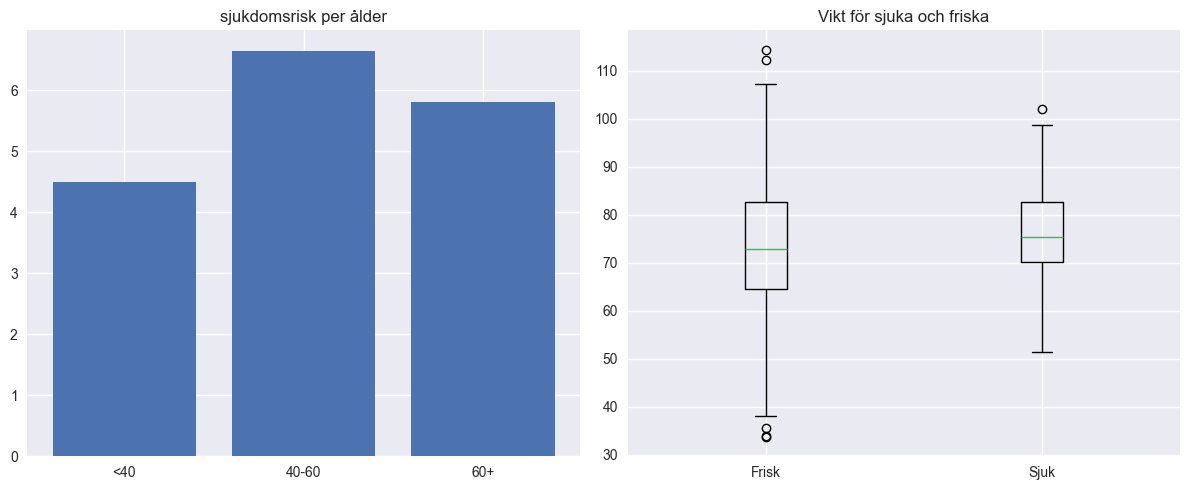

AttributeError: 'DataFrame' object has no attribute 'åldersgrgräns'

In [89]:
print("\nUTÖKAD ANALYS:")
df['åldersgräns'] =pd.cut(df['age'], bins=[0, 40, 60, 100], labels=['<40', '40-60', '60+'])

sjuk_per_ålder = df.groupby('åldersgräns')['disease'].mean() * 100
print("sjukdomrisk per ålder:")

for ålder, risk in sjuk_per_ålder.items():
    print(f" {ålder}: {risk:.1f}%")

    bp_män = df[df['sex']=='M']['systolic_bp'].mean()
    bp_kvinnor = df[df['sex']=='F']['systolic_bp'].mean()
    print(f'\nBlodtryck: män={bp_män:.1f}, kvinnor={bp_kvinnor:.1f}')

    fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))


    ax1.bar(sjuk_per_ålder.index.astype(str), sjuk_per_ålder.values)
    ax1.set_title('sjukdomsrisk per ålder')

    ax2.boxplot([df[df['disease']==0]['weight'], df[df['disease']==1]['weight']], labels= ['Frisk', 'Sjuk'])
    ax2.set_title('Vikt för sjuka och friska')

    plt.tight_layout()
    plt.show()
    print(df.åldersgrgräns)